# Unsupervised Learning

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\alias\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
phool=sns.load_dataset('iris')
phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
descriptive_feature=phool.iloc[:,:-1]
descriptive_feature

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# remove the target feature, we will deal with Descriptive feature only
descriptive_features=phool.iloc[:,:-1].values
descriptive_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Finding the optimum number of clusters for k-means classification:


The k-means algorithm aims to choose centroids that minimize the inertia,or within-cluster sum-of-squares criterion.inertia can be recognized as a measure of how internally coherent clusters are.this is what the kmeans tries to minimize with each iteration.

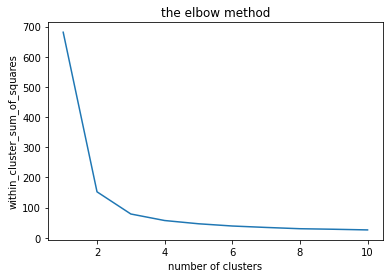

In [5]:
# Elbow Method

from sklearn.cluster import KMeans
within_cluster_sum_of_squares=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters= i,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(descriptive_features)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

# plotting the results onto a line graph , allowing us to observe 'the elbow'
plt.plot(range(1,11),within_cluster_sum_of_squares)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('within_cluster_sum_of_squares')
plt.show()

 # Apply K-Means Clustring

In [6]:
# applying kmeans to the dataset/ creating the kmeans classifier

kmeans=KMeans(n_clusters= 3,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_prediction=kmeans.fit_predict(descriptive_feature)

In [7]:
# y_prediction

# Visualizing the clusters


  plotting on the basis of Sepal Features

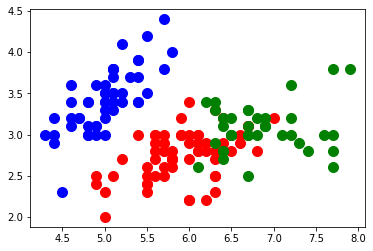

In [8]:
plt.scatter(descriptive_features[y_prediction==0,0],descriptive_features[y_prediction==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(descriptive_features[y_prediction==1,0],descriptive_features[y_prediction==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(descriptive_features[y_prediction==2,0],descriptive_features[y_prediction==2,1],s=100,c='green',label='Iris-virginica')

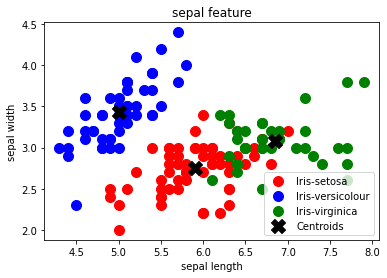

In [9]:
# visualizing the clusters
plt.scatter(descriptive_features[y_prediction==0,0],descriptive_features[y_prediction==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(descriptive_features[y_prediction==1,0],descriptive_features[y_prediction==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(descriptive_features[y_prediction==2,0],descriptive_features[y_prediction==2,1],s=100,c='green',label='Iris-virginica')

# plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',s=200,c='black',label='Centroids')
plt.title('sepal feature')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# plotting on the basis of petal Features

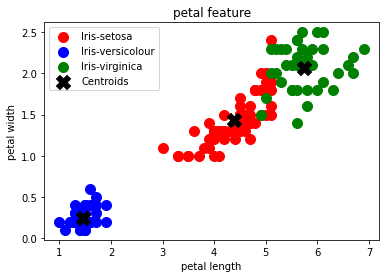

In [10]:
# visualizing the clusters
plt.scatter(descriptive_features[y_prediction==0,2],descriptive_features[y_prediction==0,3],s=100,c='red',label='Iris-setosa')
plt.scatter(descriptive_features[y_prediction==1,2],descriptive_features[y_prediction==1,3],s=100,c='blue',label='Iris-versicolour')
plt.scatter(descriptive_features[y_prediction==2,2],descriptive_features[y_prediction==2,3],s=100,c='green',label='Iris-virginica')

# plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],marker='X',s=200,c='black',label='Centroids')
plt.title('petal feature')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

# Match accuracy with labels i.e species in iris data

In [11]:
target_feature=phool.iloc[:,-1:]
target_feature

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


# changing categorical data into numeric data

In [12]:
target_feature=target_feature.replace('setosa',1)
target_feature=target_feature.replace('versicolor',0)
target_feature=target_feature.replace('virginica',2)
target_feature

,species
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


# Measuring Accuracy

In [13]:
from sklearn.metrics import accuracy_score
score=accuracy_score(target_feature,y_prediction)
print('accuracy score of k-means classification is:',score)

accuracy score of k-means classification is: 0.8933333333333333


# confusion metrix

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(target_feature,y_prediction)
cm

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score:0.8933333333333333')

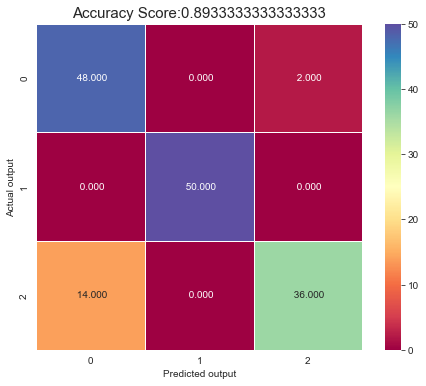

In [15]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt=" .3f",linewidths=.5,square=True,cmap='Spectral');
plt.ylabel('Actual output');
plt.xlabel('Predicted output');
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15)

# K Mediods

In [16]:
pip install scikit-learn-extra

  Using cached scikit-learn-extra-0.2.0.tar.gz (813 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build scikit-learn-extra
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\alias\AppData\Local\Programs\Python\Python310\python.exe' 'C:\Users\alias\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\alias\AppData\Local\Temp\tmplbq6fz_3'
       cwd: C:\Users\alias\AppData\Local\Temp\pip-install-vls6b7nj\scikit-learn-extra_e803262b432842fa9198819e53401394
  Complete output (48 lines):
  C:\Users\alias\AppData\Local\Temp\pip-build-env-ga7snya1\overlay\Lib\site-packages\setuptools\dist.py:723: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\benchmarks
  copying benchmarks\bench_rbfsampler_fastfood.py -> build\lib.win-amd64-3.10\benchmarks
  copying be

In [17]:
# applying kmeans to the dataset/ creating the kmeans classifier
from  sklearn_extra.cluster import KMedoids
k_medians=KMedoids(n_clusters= 3,metric='euclidean',method='alternate',init= 'heuristic',max_iter=300,n_init=10,random_state=False)
y_prediction=k_medians.fit_predict(descriptive_features)

ModuleNotFoundError: No module named 'sklearn_extra'